In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(r'C:\Users\Adeel\Desktop\Deep Learning\Deep_learning\placement.csv')

In [6]:
df.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


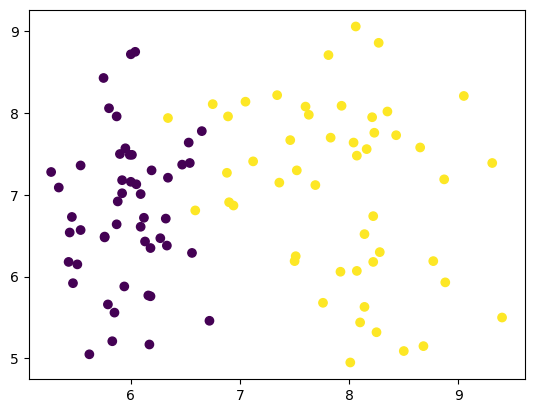

In [11]:
plt.scatter(df['cgpa'],df['resume_score'],c=df['placed'])

In [12]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [13]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [24]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_uniform'))
model.add(Dense(10,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.get_weights()

[array([[ 0.18654656,  1.0805255 , -1.3979483 ,  1.1869751 ,  0.01487577,
          0.6368393 ,  0.7490796 ,  1.1514944 ,  1.1326064 , -0.84378123],
        [ 1.3568033 , -1.1226691 ,  1.4949116 ,  0.10315979,  1.7159787 ,
          0.71757424,  1.3731979 , -0.26160908, -0.9644709 , -1.1593753 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.46355402, -0.15046436,  0.36582232, -0.54072535,  0.22791958,
         -0.41792944, -0.65896857,  0.43273413,  0.20574707, -0.52420753],
        [-0.42793974,  0.3768083 ,  0.6765448 ,  0.5213218 , -0.256936  ,
         -0.58168435,  0.7169328 , -0.2459048 ,  0.3926525 , -0.6430738 ],
        [ 0.48359036,  0.70534384,  0.00952309, -0.09847933, -0.48602733,
          0.5328045 ,  0.27528226, -0.22371334,  0.24212587, -0.3787119 ],
        [-0.49916682,  0.4653821 , -0.68246055, -0.43931058, -0.72048765,
          0.11322939,  0.4091537 ,  0.28050828, -0.6621114 ,  0.39788663],
        [-0.14502

In [26]:
initial_weights = model.get_weights()

In [27]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [28]:
model.set_weights(initial_weights)

In [29]:
model.get_weights()

[array([[-0.12282179,  0.45329523, -0.15612774, -0.01828624, -0.54988027,
         -0.7734669 ,  0.49031448,  0.10984303,  0.48090073,  0.03490116],
        [ 0.7951227 , -0.52578825, -0.48726907,  0.28378707, -0.05014938,
         -0.15068212, -1.9137223 , -0.61293304,  0.53673196,  1.0831207 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.01837535,  0.13727747,  0.05680153, -0.308124  ,  0.06948849,
         -0.4587986 ,  0.01155626, -0.0322909 ,  0.13189134, -0.04838797],
        [ 0.13612926, -0.43616033,  0.15085927,  0.12386577, -0.45733437,
          0.11594396,  0.26386622,  0.25897968, -0.17937978, -0.12585987],
        [ 0.25215128, -0.3523886 , -0.61926335,  0.2069419 ,  0.18649226,
         -0.01071035, -0.45990577,  0.09928076,  0.3744185 , -0.34341267],
        [-0.24103537, -0.12359079,  0.08647531,  0.18535334, -0.2906507 ,
          0.17402145, -0.34567353,  0.25570947, -0.36243606,  0.23469606],
        [-0.24171

In [30]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [34]:
history = model.fit(X,y,epochs=500,validation_split=0.2)

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.8258 - loss: 0.4549 - val_accuracy: 0.7500 - val_loss: 0.5007
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7812 - loss: 0.4829 - val_accuracy: 0.7500 - val_loss: 0.5159
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8242 - loss: 0.4445 - val_accuracy: 0.7500 - val_loss: 0.5145
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8242 - loss: 0.4434 - val_accuracy: 0.7500 - val_loss: 0.5063
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.8047 - loss: 0.4452 - val_accuracy: 0.7500 - val_loss: 0.5104
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.8125 - loss: 0.4439 - val_accuracy: 0.7500 - val_loss: 0.5128
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8180 - loss: 0.4252 - val_accuracy: 0.7500 - val_loss: 0.5067
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7812 - loss: 0.4590 - val_accuracy: 0.7500 - val_loss:

In [35]:
model.get_weights()

[array([[-2.7123603e-01,  5.9730875e-01, -1.5612774e-01, -1.1143005e-03,
         -5.4988027e-01, -7.7346689e-01,  4.9031448e-01,  1.0984303e-01,
          6.2565154e-01, -7.5922101e-03],
        [ 8.1299704e-01, -3.6309278e-01, -4.8726907e-01,  3.2281926e-01,
         -5.0149377e-02, -1.5068212e-01, -1.9137223e+00, -6.1293304e-01,
          5.3778028e-01,  1.0023503e+00]], dtype=float32),
 array([ 0.64406294, -0.41706258,  0.        ,  0.6065812 ,  0.        ,
         0.        ,  0.        ,  0.        , -0.7011818 , -0.00176608],
       dtype=float32),
 array([[-0.01837535,  0.27835017,  0.14800382, -0.308124  , -0.04271662,
         -0.4587986 ,  0.01155626, -0.10724255,  0.13189134,  0.0297472 ],
        [ 0.13612926, -0.76687413, -0.02561291,  0.12386577, -0.36871067,
          0.11594396,  0.26386622,  0.41096613, -0.17937978, -0.14798065],
        [ 0.25215128, -0.3523886 , -0.61926335,  0.2069419 ,  0.18649226,
         -0.01071035, -0.45990577,  0.09928076,  0.3744185 , -0.3

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step


<Axes: >

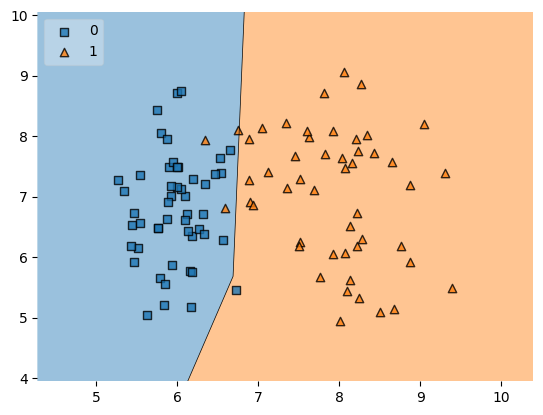

In [36]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [37]:
(np.random.randn(10,10)*0.01).min()

np.float64(-0.024424893648911934)

In [38]:
(np.random.randn(10,10)*0.01).max()

np.float64(0.02260066893566475)